Missing values before handling:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Missing values after handling:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Decision Tree Accuracy: 0.794

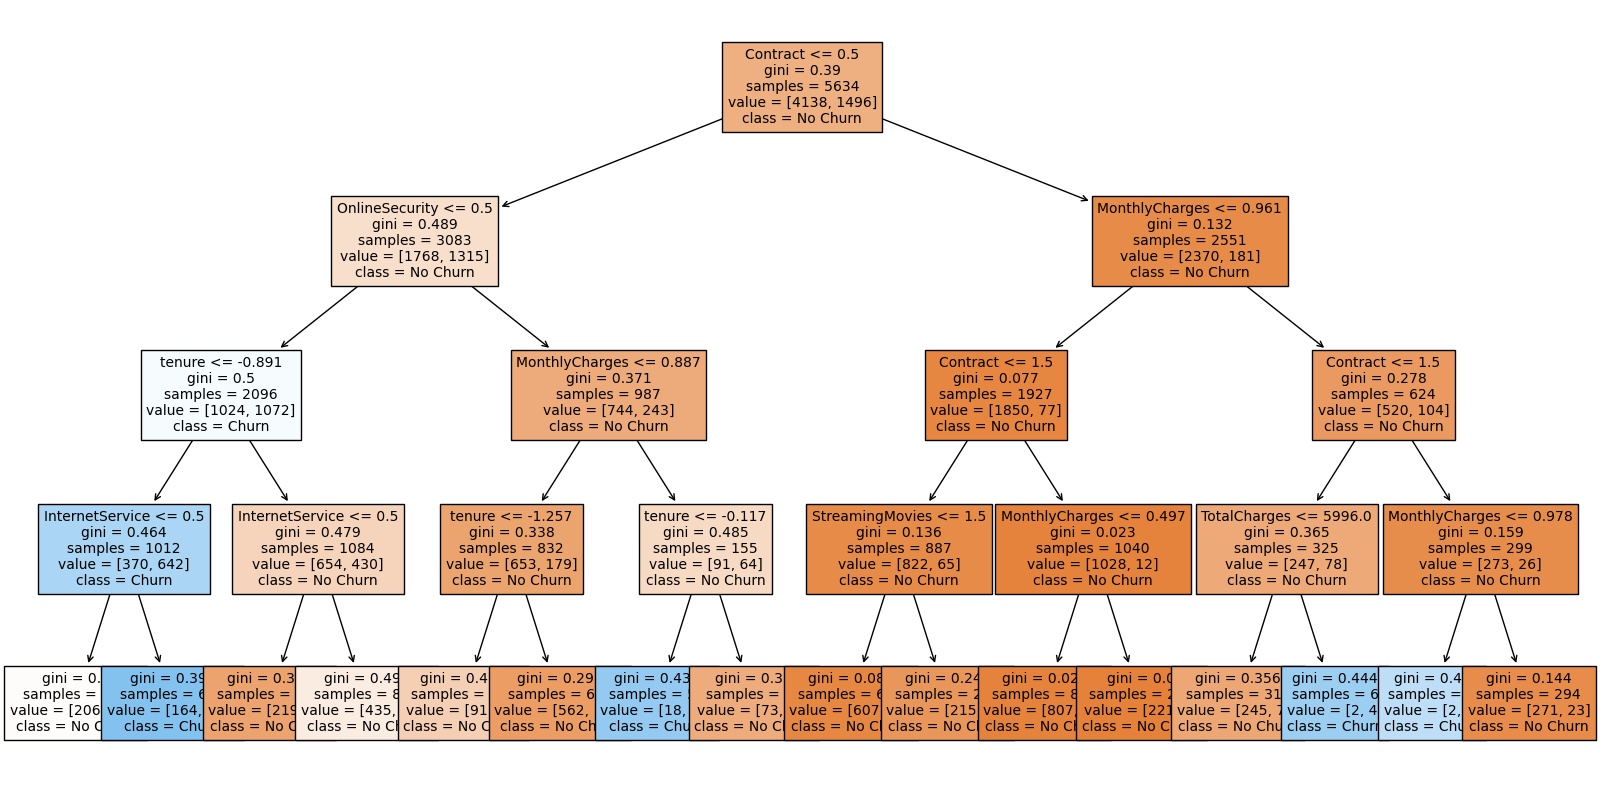

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load dataset
file_path = r"C:\Users\KIIT\Downloads\kaggle\input\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Drop customer ID (not needed for prediction)
df.drop(columns=['customerID'], inplace=True)

# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Handle missing values (Fixed to avoid FutureWarning)
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical column
        df[col] = df[col].fillna(df[col].mode()[0])  # Replace with most frequent value
    else:  # Numerical column
        df[col] = df[col].fillna(df[col].median())  # Replace with median

# Confirm missing values are handled
print("Missing values after handling:\n", df.isnull().sum())

# Convert categorical variables to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Identify continuous (numerical) columns for scaling
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure 'Churn' is not in the list before removing
if 'Churn' in continuous_columns:
    continuous_columns.remove('Churn')

# Apply StandardScaler to continuous columns
scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Split data into features (X) and target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Limit depth for better visualization
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, fontsize=10)
plt.show()
